In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('../data/train_data.csv')
X_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
y_train = pd.read_csv('../data/train_targets.csv')
y_train

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [4]:
df = X_train.merge(y_train, on='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

# One record for each id

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
id_counts = df.id.unique()

len(id_counts)

59400

# Year distributions

In [7]:
df.date_recorded.unique()

array(['2011-03-14', '2013-03-06', '2013-02-25', '2013-01-28',
       '2011-07-13', '2011-03-13', '2012-10-01', '2012-10-09',
       '2012-11-03', '2011-08-03', '2011-02-20', '2013-02-18',
       '2012-10-14', '2013-03-15', '2012-10-20', '2011-08-04',
       '2011-07-04', '2011-09-04', '2011-07-22', '2011-02-22',
       '2011-02-27', '2013-02-10', '2011-10-04', '2013-11-03',
       '2013-01-21', '2013-01-16', '2011-07-11', '2013-03-05',
       '2013-03-16', '2011-03-23', '2011-03-16', '2013-03-19',
       '2011-03-11', '2011-02-23', '2013-03-28', '2011-07-16',
       '2011-03-27', '2013-02-11', '2013-10-03', '2011-03-12',
       '2011-07-07', '2013-01-15', '2013-03-18', '2012-10-22',
       '2013-02-05', '2011-07-27', '2011-04-04', '2013-02-21',
       '2011-08-18', '2011-07-31', '2011-08-01', '2011-07-14',
       '2013-02-22', '2013-07-03', '2013-08-03', '2013-01-22',
       '2011-03-22', '2013-05-03', '2013-01-19', '2013-02-09',
       '2011-01-04', '2013-02-04', '2011-03-05', '2011-

In [8]:
df.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [9]:
has_year = df[df['construction_year'] !=0]
has_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38691 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38691 non-null  int64  
 1   amount_tsh             38691 non-null  float64
 2   date_recorded          38691 non-null  object 
 3   funder                 37350 non-null  object 
 4   gps_height             38691 non-null  int64  
 5   installer              37345 non-null  object 
 6   longitude              38691 non-null  float64
 7   latitude               38691 non-null  float64
 8   wpt_name               38691 non-null  object 
 9   num_private            38691 non-null  int64  
 10  basin                  38691 non-null  object 
 11  subvillage             38681 non-null  object 
 12  region                 38691 non-null  object 
 13  region_code            38691 non-null  int64  
 14  district_code          38691 non-null  int64  
 15  lg

In [10]:
status_code_numeric = {'functional':2,
                      'functional needs repair': 1,
                      'non functional': 0}

df['status_code'] = df.status_group.replace(status_code_numeric)
df.status_code.value_counts()

2    32259
0    22824
1     4317
Name: status_code, dtype: int64

In [11]:
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [12]:
has_year = df[df['construction_year'] !=0].copy()
has_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38691 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38691 non-null  int64  
 1   amount_tsh             38691 non-null  float64
 2   date_recorded          38691 non-null  object 
 3   funder                 37350 non-null  object 
 4   gps_height             38691 non-null  int64  
 5   installer              37345 non-null  object 
 6   longitude              38691 non-null  float64
 7   latitude               38691 non-null  float64
 8   wpt_name               38691 non-null  object 
 9   num_private            38691 non-null  int64  
 10  basin                  38691 non-null  object 
 11  subvillage             38681 non-null  object 
 12  region                 38691 non-null  object 
 13  region_code            38691 non-null  int64  
 14  district_code          38691 non-null  int64  
 15  lg

In [13]:
has_year['construction_year_formatted'] = has_year['construction_year'].map(lambda x: '1-1-'+str(x))
has_year['construction_year_formatted'] = has_year['construction_year_formatted'].map(lambda x: pd.to_datetime(x))

In [14]:
has_year.construction_year_formatted.value_counts()

2010-01-01    2645
2008-01-01    2613
2009-01-01    2533
2000-01-01    2091
2007-01-01    1587
2006-01-01    1471
2003-01-01    1286
2011-01-01    1256
2004-01-01    1123
2012-01-01    1084
2002-01-01    1075
1978-01-01    1037
1995-01-01    1014
2005-01-01    1011
1999-01-01     979
1998-01-01     966
1990-01-01     954
1985-01-01     945
1996-01-01     811
1980-01-01     811
1984-01-01     779
1982-01-01     744
1994-01-01     738
1972-01-01     708
1974-01-01     676
1997-01-01     644
1992-01-01     640
1993-01-01     608
2001-01-01     540
1988-01-01     521
1983-01-01     488
1975-01-01     437
1986-01-01     434
1976-01-01     414
1970-01-01     411
1991-01-01     324
1989-01-01     316
1987-01-01     302
1981-01-01     238
1977-01-01     202
1979-01-01     192
1973-01-01     184
2013-01-01     176
1971-01-01     145
1960-01-01     102
1967-01-01      88
1963-01-01      85
1968-01-01      77
1969-01-01      59
1964-01-01      40
1962-01-01      30
1961-01-01      21
1965-01-01  

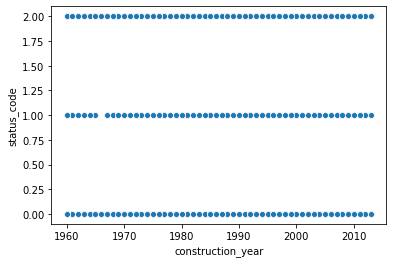

In [15]:
sns.scatterplot(has_year.construction_year, has_year.status_code)

In [16]:
broken = has_year[has_year['status_code']==0]
functional =  has_year[has_year['status_code']==2]
needs_repair = has_year[has_year['status_code']==1]

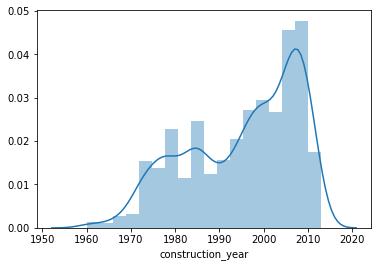

In [17]:
sns.distplot(needs_repair.construction_year)

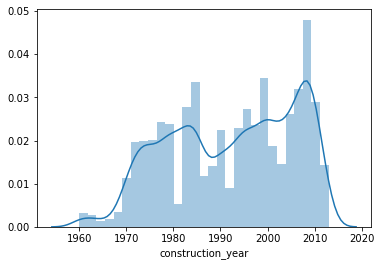

In [18]:
sns.distplot(broken.construction_year)

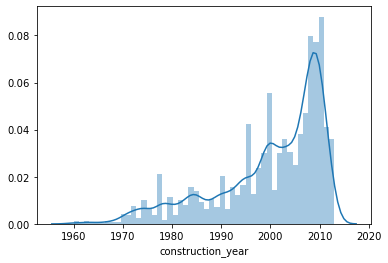

In [19]:
sns.distplot(functional.construction_year)

# Funder, installer, management

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [21]:
df.groupby('installer').id.count()

installer
-                   3
0                 777
A.D.B               1
AAR                 4
ABASIA             29
                 ... 
water board         2
wizara ya maji      2
world               4
world banks         1
world vision        1
Name: id, Length: 2145, dtype: int64

In [22]:
for name in sorted(list(df.installer.unique())):
    print(name)

TypeError: '<' not supported between instances of 'float' and 'str'

In [23]:
df['installer'] = df.installer.fillna('unknown')

In [24]:
df['installer_clean'] = df['installer']

In [25]:
for name in sorted(list(df.installer.unique())):
    print(name)

-
0
A.D.B
AAR
ABASIA
ABD
ABDALA
ABDUL
AC
ACORD
ACRA
ACT
ACT MARA
ACTION AID
ACTIVE TANK CO
ACTIVE TANK CO LTD
AD
ADAP
ADB
ADP
ADP Busangi
ADRA
ADRA /Government
ADRA/Government
AF
AFRICA
AFRICA MUSLIM
AFRICAN DEVELOPMENT FOUNDATION
AFRICAN REFLECTIONS FOUNDATION
AGRICAN
AI
AIC
AIC KI
AICT
AIMGOLD
AIXOS
ALIA
ALLYS
AMP Contract
AMP Contracts
AMP contractor
AMREF
ANGLI
ANGLIKANA CHURCH
ANGRIKANA
ANSWAR
APM
AQAL
AQUA BLUES ANGELS
AQUA WEL
AQUA Wat
AQUA Wel
AQUARMAN DRILLERS
ASDP
ATIGH BUILDINGS
AUSTRALIA
AUWASA
Aartisa
Abdallah Ally Wazir
Accra
Action Aid
Action Contre La Faim
Action Contre la Faim
Active KMK
Active MKM
Adam
Adam Kea
Adam mualuaka
Adra
Adra /Community
Adra/ Community
Adra/Community
Adrs
Af
Africa
Africa Amini Alama
Africa Islamic Agency Tanzania
Africa M
Africa Muslim Agenc
African Muslims Age
African Realief Committe of Ku
Africaone
Africaone Ltd
Africare
Afroz Ismail
Ahmad
Al Ha
Alex moyela
Altai Co. ltd
Amadi
Amari
Amboni Plantation
Amboni plantation
Ambrose
Amec
America

In [26]:
len(list(df.installer.unique()))

2145